In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import numpy as np
import xgi
import matplotlib.pyplot as plt
from src import *
import networkx as nx

In [54]:
G = nx.karate_club_graph()
# G = nx.barbell_graph(4, 1)

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

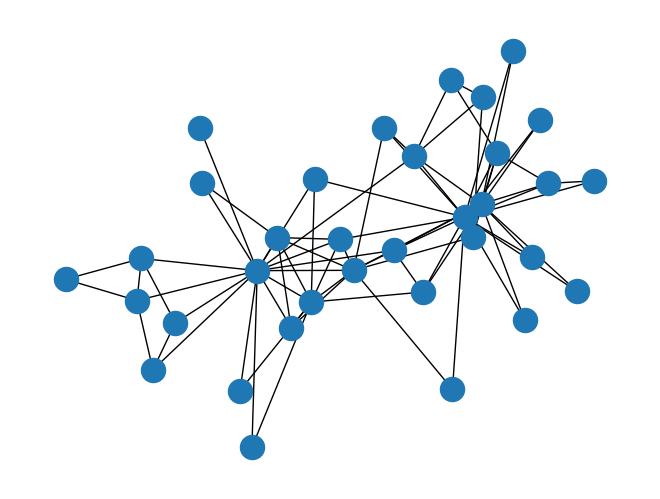

In [55]:
nx.draw(G)

In [56]:
save_data = False

In [99]:
s0 = np.zeros(n)
p_s = 0.2
s0[list(random.sample(range(n), int(p_s * n)))] = 1

alpha = 0
gamma = 0.05
beta = 0.05

contagion_function = lambda nu, beta: 1 - (1 - beta) ** nu
c = contagion_function(np.arange(n), beta)

x = contagion_process(A, gamma, c, s0, tmin=0, tmax=100, random_seed=None)

In [100]:
c

array([0.        , 0.05      , 0.0975    , 0.142625  , 0.18549375,
       0.22621906, 0.26490811, 0.3016627 , 0.33657957, 0.36975059,
       0.40126306, 0.43119991, 0.45963991, 0.48665792, 0.51232502,
       0.53670877, 0.55987333, 0.58187966, 0.60278568, 0.6226464 ,
       0.64151408, 0.65943837, 0.67646646, 0.69264313, 0.70801098,
       0.72261043, 0.73647991, 0.74965591, 0.76217311, 0.77406446,
       0.78536124, 0.79609317, 0.80628852, 0.81597409])

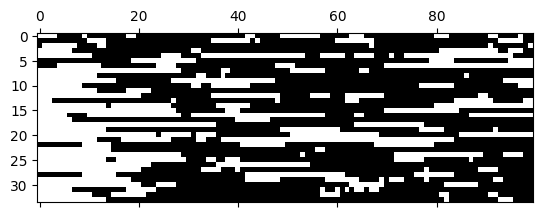

In [101]:
plt.spy(x.T)

In [102]:
p_c = np.zeros((n, n))

rho = 0.27

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, 0.3))

samples, l_vals = infer_adjacency_matrix(
    x, A, rho, p_c, nsamples=100, burn_in=10000, skip=100
)

Acceptance ratio is 0.13020100502512563


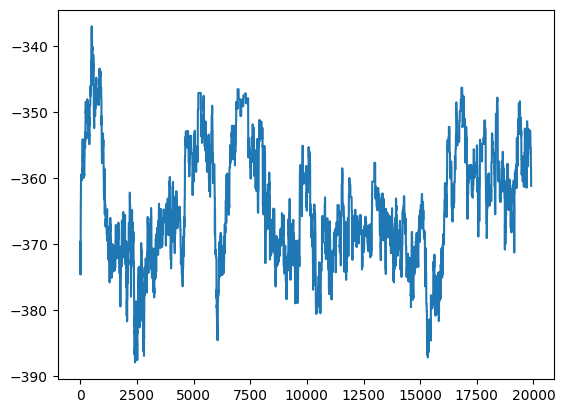

In [103]:
plt.plot(l_vals)

In [104]:
np.mean(samples, axis=0)

array([[0.  , 0.31, 0.49, ..., 1.  , 0.  , 0.  ],
       [0.31, 0.  , 0.06, ..., 0.01, 0.44, 0.  ],
       [0.49, 0.06, 0.  , ..., 0.41, 0.46, 0.  ],
       ...,
       [1.  , 0.01, 0.41, ..., 0.  , 0.8 , 0.  ],
       [0.  , 0.44, 0.46, ..., 0.8 , 0.  , 0.2 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.2 , 0.  ]])

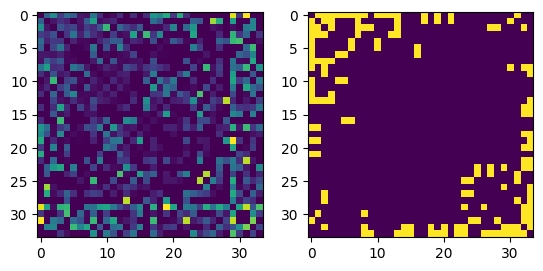

In [105]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p, cmap="viridis", vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(A.todense(), vmin=0, vmax=1)

In [32]:
samples = 1000

rho = np.zeros(samples)
gamma = np.zeros(samples)
c_samples = np.zeros((samples, n))

p_rho = np.array([0, 0])
p_gamma = np.array([0, 0])
p_c = np.zeros((2, n))

for i in range(1000):
    r, g, b = infer_dynamics(x, A, p_rho, p_gamma, p_c)
    rho[i] = r
    gamma[i] = g
    c_samples[i] = b

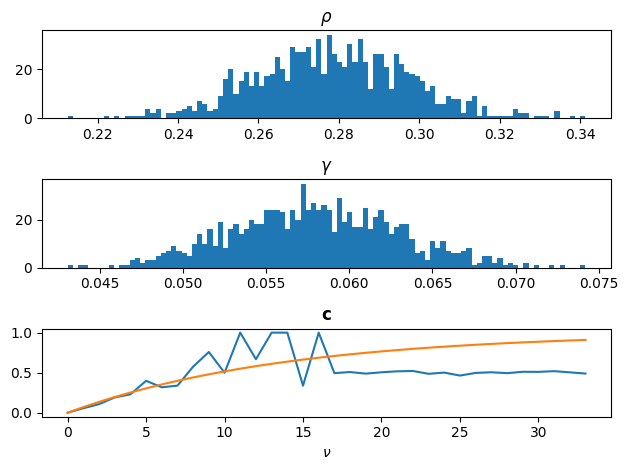

In [39]:
plt.figure()
plt.subplot(311)
plt.title(r"$\rho$")
plt.hist(rho, bins=100)

plt.subplot(312)
plt.title(r"$\gamma$")
plt.hist(gamma, bins=100)

plt.subplot(313)
plt.title(r"$\mathbf{c}$")
plt.plot(np.mean(c_samples, axis=0))
plt.xlabel(r"$\nu$")
plt.plot(c)

plt.tight_layout()
plt.show()